<a href="https://colab.research.google.com/github/FerbeiPatricia/PMP-2024/blob/main/Laborator11_PMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Ore_Studiu  Ore_Somn  Promovare
0        6.50      8.46          1
1        5.86      8.95          1
2        6.65      7.30          1
3        7.52      8.28          1
4        5.77      7.67          1
       Ore_Studiu    Ore_Somn   Promovare
count  500.000000  500.000000  500.000000
mean     4.006780    6.515760    0.500000
std      2.221241    1.531357    0.500501
min     -1.240000    3.790000    0.000000
25%      2.005000    5.070000    0.000000
50%      4.090000    6.485000    0.500000
75%      6.060000    7.970000    1.000000
max      9.850000    9.290000    1.000000


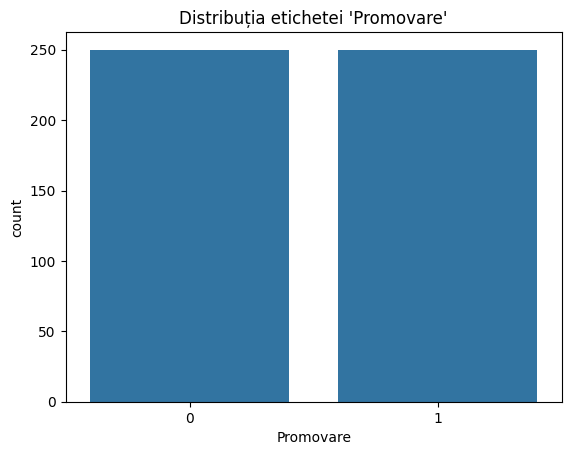

Distribuția etichetelor:
 Promovare
1    250
0    250
Name: count, dtype: int64


Output()

Output()

ERROR:pymc.stats.convergence:There were 114 divergences after tuning. Increase `target_accept` or reparameterize.


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta0 -29.482  4.900 -38.818  -20.875      0.153    0.111    1060.0    1152.0   
beta1   2.366  0.932   0.690    4.053      0.030    0.022     982.0    1143.0   
beta2   3.142  0.849   1.773    4.885      0.030    0.022     891.0     790.0   

       r_hat  
beta0    1.0  
beta1    1.0  
beta2    1.0  
Granița de decizie: -29.48 + 2.37*x1 + 3.14*x2 = 0


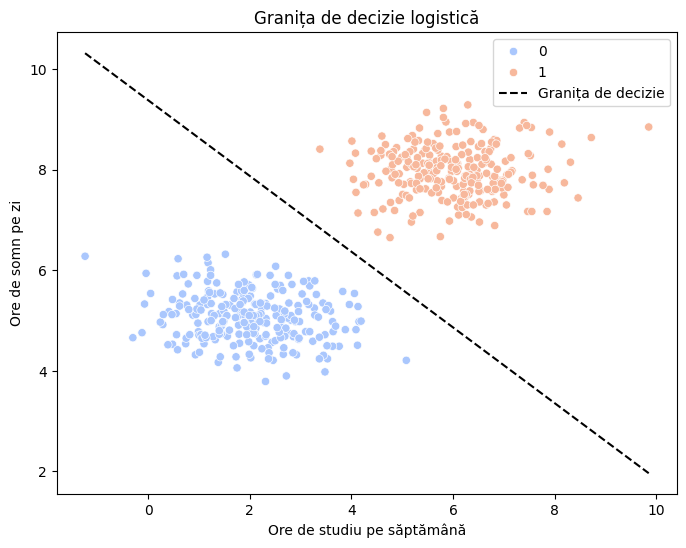

Coeficient pentru ore studiu (beta1): 2.37
Coeficient pentru ore somn (beta2): 3.14
Orele de somn influențează mai mult promovabilitatea.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import numpy as np

data = pd.read_csv("date_promovare_examen.csv")

print(data.head())
print(data.describe())

sns.countplot(x='Promovare', data=data)
plt.title("Distribuția etichetei 'Promovare'")
plt.show()

class_counts = data['Promovare'].value_counts()
print("Distribuția etichetelor:\n", class_counts)

x1 = data['Ore_Studiu'].values
x2 = data['Ore_Somn'].values
y = data['Promovare'].values

with pm.Model() as logistic_model:
    beta0 = pm.Normal("beta0", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    beta2 = pm.Normal("beta2", mu=0, sigma=10)

    p = pm.math.sigmoid(beta0 + beta1 * x1 + beta2 * x2)

    y_obs = pm.Bernoulli("y_obs", p=p, observed=y)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.95)

print(pm.summary(trace))

beta0_mean = trace.posterior["beta0"].mean().values
beta1_mean = trace.posterior["beta1"].mean().values
beta2_mean = trace.posterior["beta2"].mean().values

print(f"Granița de decizie: {beta0_mean:.2f} + {beta1_mean:.2f}*x1 + {beta2_mean:.2f}*x2 = 0")

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Ore_Studiu", y="Ore_Somn", hue="Promovare", data=data, palette="coolwarm")

x_vals = np.linspace(data['Ore_Studiu'].min(), data['Ore_Studiu'].max(), 100)
y_vals = -(beta0_mean + beta1_mean * x_vals) / beta2_mean
plt.plot(x_vals, y_vals, color="black", linestyle="--", label="Granița de decizie")

plt.xlabel("Ore de studiu pe săptămână")
plt.ylabel("Ore de somn pe zi")
plt.title("Granița de decizie logistică")
plt.legend()
plt.show()

print(f"Coeficient pentru ore studiu (beta1): {beta1_mean:.2f}")
print(f"Coeficient pentru ore somn (beta2): {beta2_mean:.2f}")

if abs(beta1_mean) > abs(beta2_mean):
    print("Orele de studiu influențează mai mult promovabilitatea.")
else:
    print("Orele de somn influențează mai mult promovabilitatea.")
